In [16]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import yfinance as yf

In [17]:
#load Delta data
df = yf.download("DAL", start="2015-01-01", end="2023-08-31")
print(df)
print(type(df))

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  49.919998  50.009998  48.709999  49.180000  44.174541   8637300
2015-01-05  49.459999  49.480000  47.810001  48.360001  43.437996  10556500
2015-01-06  48.549999  48.740002  46.250000  47.220001  42.414024  12880400
2015-01-07  47.480000  47.590000  46.509998  46.970001  42.189468  10516200
2015-01-08  47.480000  48.320000  47.259998  48.189999  43.285297  10499300
...               ...        ...        ...        ...        ...       ...
2023-08-24  42.000000  42.480000  41.709999  41.900002  41.900002   5478200
2023-08-25  42.099998  42.160000  41.139999  41.700001  41.700001   5804500
2023-08-28  41.730000  42.439999  41.730000  42.410000  42.410000   4454500
2023-08-29  42.369999  44.060001  42.240002  43.770000  43.770000   8969800
2023-08-30  43.7799

In [18]:
#missing values
missing_values = df.isnull().values.any()
if missing_values:
  print("There are missing values.")
else:
  print("There are no missing values.")

There are no missing values.


In [19]:
# Print information about the data including its shape, datatypes, number of values
def df_summary(df):
    print('--- Shape: {}'.format(df.shape))
    print('\n--- Info')
    display(df.info())
    print('\n--- Descriptions')
    display(df.describe(include='all'))
    print('\n---Unique Rows')
    display(df.apply(lambda x: x.nunique()))

df_summary(df)

--- Shape: (2180, 6)

--- Info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2180 entries, 2015-01-02 to 2023-08-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2180 non-null   float64
 1   High       2180 non-null   float64
 2   Low        2180 non-null   float64
 3   Close      2180 non-null   float64
 4   Adj Close  2180 non-null   float64
 5   Volume     2180 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 119.2 KB


None


--- Descriptions


,Open,High,Low,Close,Adj Close,Volume
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2.180000e+03
mean,44.840560,45.430904,44.192532,44.805303,42.993143,1.203035e+07
std,8.881928,8.850747,8.940133,8.892963,8.322952,1.123489e+07
min,18.799999,19.540001,17.510000,19.190001,19.149778,1.076000e+06
25%,38.917499,39.477500,38.337501,38.929999,37.830540,6.798050e+06
50%,45.910000,46.405001,45.095001,45.865000,42.775154,9.250000e+06
75%,51.299999,51.919998,50.742501,51.232500,48.731807,1.278300e+07
max,63.230000,63.439999,62.380001,63.160000,62.133465,1.346265e+08



---Unique Rows


Open         1546
High         1537
Low          1596
Close        1602
Adj Close    1990
Volume       2169
dtype: int64

19.190000534057617
63.15999984741211


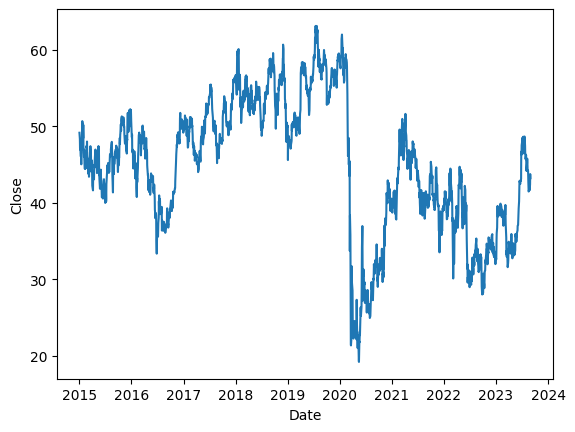

In [20]:
#plot historical data
sns.lineplot(x=df.index, y='Close', data=df)
min_close = df['Close'].min()
max_close = df['Close'].max()

print(min_close)
print(max_close)

Upward trend of the stock price with the highest close value of 63.16. You can see a major drop in stock price in 2020 due to COVID-19 with the lowest value of 19.19. Still has not quite reached the prepandemic levels of closing.



```
```

# Strategy 1- If the next trading day's close price is greater than today's close price then the signal is ‘buy’, otherwise ‘sell’

Training split input-  (1744, 1)
Testing split input-  (436, 1)
K-Nearest Neighbors - Accuracy: 0.48
K-Nearest Neighbors - Precision: 0.44
K-Nearest Neighbors - Recall: 0.53


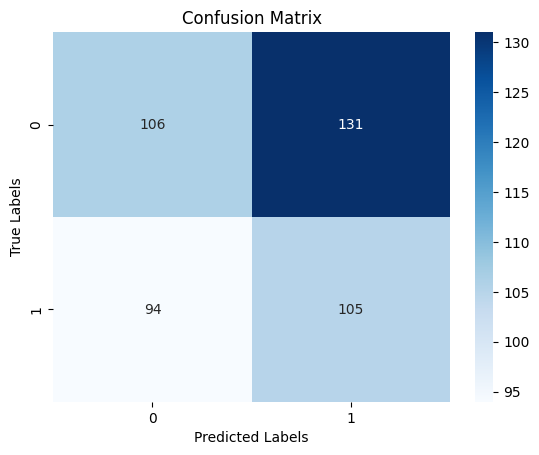

Random Forest - Accuracy: 0.50
Random Forest - Precision: 0.46
Random Forest - Recall: 0.54


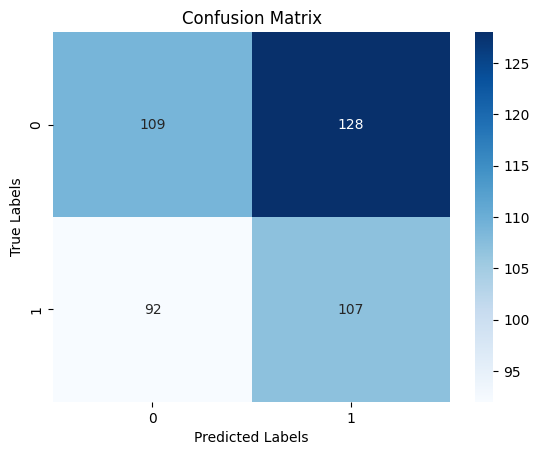

Gradient Boosting - Accuracy: 0.48
Gradient Boosting - Precision: 0.45
Gradient Boosting - Recall: 0.66


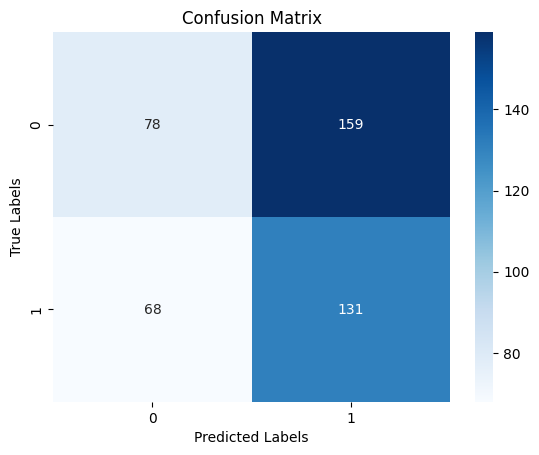

Support Vector Machine - Accuracy: 0.44
Support Vector Machine - Precision: 0.44
Support Vector Machine - Recall: 0.82


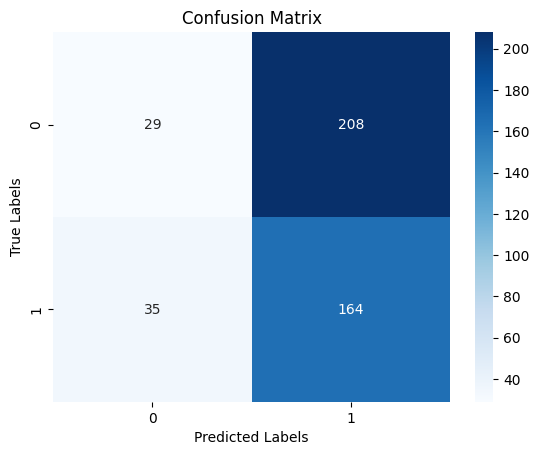

XGBoost - Accuracy: 0.48
XGBoost - Precision: 0.45
XGBoost - Recall: 0.55


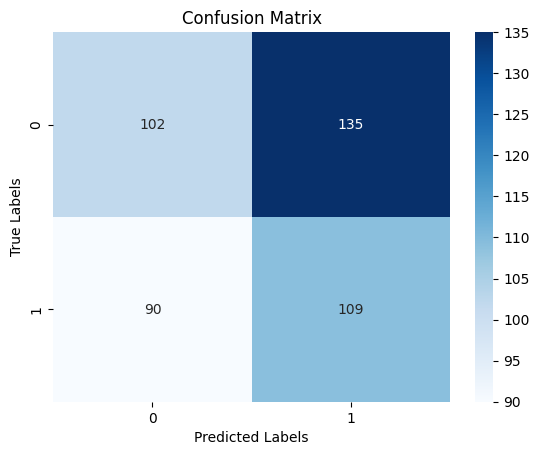

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

#create signal column
df['Signal'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)  # Map -1 to 0 and 1 to 1

#define x
X = df[['Close']]

# define y
y = df['Signal']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

# create a dictionary of classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

# create loop through each classifier and evaluate the classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name} - Accuracy: {accuracy:.2f}')

    #precision and recall scores
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'{clf_name} - Precision: {precision:.2f}')
    print(f'{clf_name} - Recall: {recall:.2f}')

    # print the confusion matrix
    cmatrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


Overall, strategy 1 was not effective in giving accurate signals since the classifiers had low accuracy scores.

#Strategy 2: 50 day MA vs. 200 day MA

In [7]:
df2 = yf.download("DAL", start="2015-01-01", end="2023-08-31")

# Calculate the 50-day and 200-day moving averages
df2['50_MA'] = df2['Close'].rolling(window=50).mean()
df2['200_MA'] = df2['Close'].rolling(window=200).mean()

#define signal
df2['Signal'] = np.where(df2['50_MA'] > df2['200_MA'], 1, 0)

#handle missing values
df2.dropna(subset=['50_MA', '200_MA'], inplace=True)

print(df2[['50_MA', '200_MA', 'Signal']].head(10))

[*********************100%%**********************]  1 of 1 completed
              50_MA    200_MA  Signal
Date                                 
2015-10-16  46.0686  45.10180       1
2015-10-19  46.1470  45.10725       1
2015-10-20  46.2236  45.11620       1
2015-10-21  46.2704  45.12730       1
2015-10-22  46.3546  45.14650       1
2015-10-23  46.4256  45.16055       1
2015-10-26  46.4994  45.18275       1
2015-10-27  46.5570  45.20680       1
2015-10-28  46.6126  45.22445       1
2015-10-29  46.6810  45.25040       1


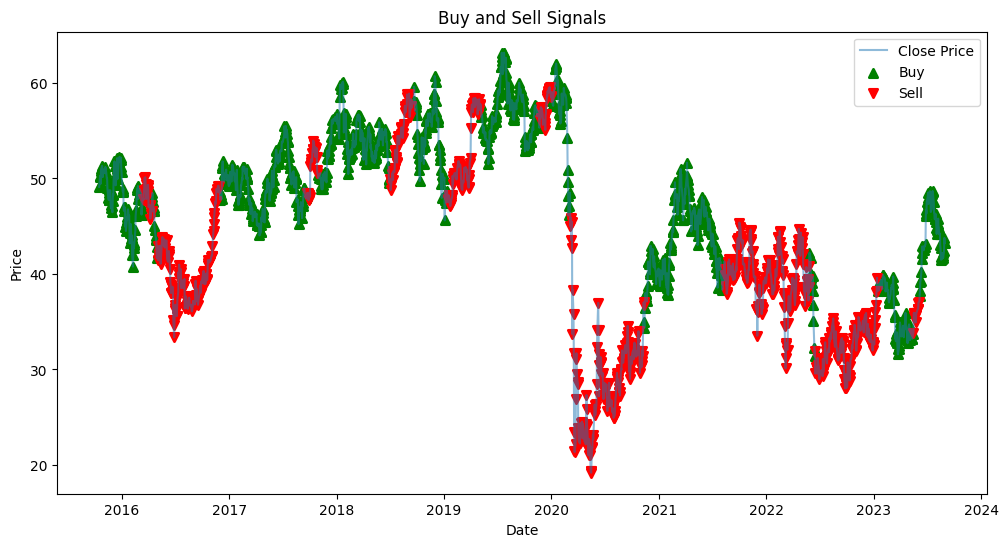

1    1100
0     880
Name: Signal, dtype: int64


In [8]:
# Create graph showing the signals
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df2.index, df2['Close'], label='Close Price', alpha=0.5)

ax.scatter(df2.index[df2['Signal'] == 1], df2['Close'][df2['Signal'] == 1],
           marker='^', color='green', label='Buy', lw=2)

ax.scatter(df2.index[df2['Signal'] == 0], df2['Close'][df2['Signal'] == 0],
           marker='v', color='red', label='Sell', lw=2)

ax.set_title('Buy and Sell Signals')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()

#count of signals
signal_counts = df2['Signal'].value_counts()
print(signal_counts)

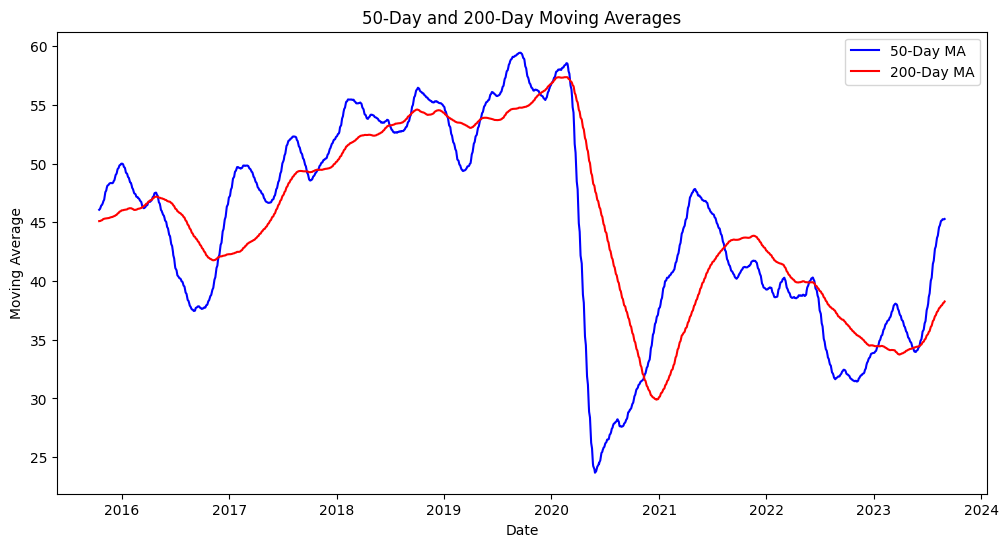

In [9]:
# graph of moving averages
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(df2.index, df2['50_MA'], label='50-Day MA', color='blue')
ax.plot(df2.index, df2['200_MA'], label='200-Day MA', color='red')

ax.set_xlabel('Date')
ax.set_ylabel('Moving Average')
ax.set_title('50-Day and 200-Day Moving Averages')
ax.legend()
plt.show()

K-Nearest Neighbors - Accuracy: 0.99
K-Nearest Neighbors - Precision: 0.99
K-Nearest Neighbors - Recall: 0.99


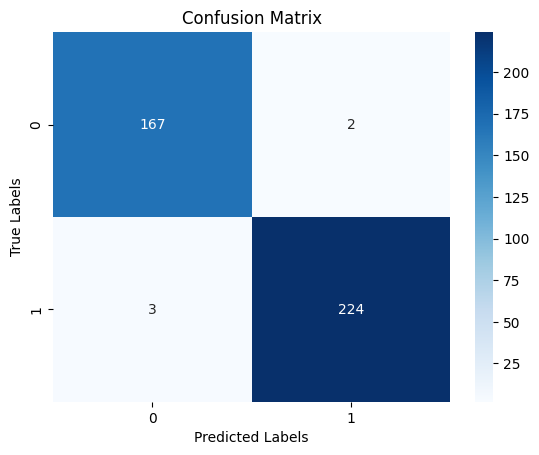

Random Forest - Accuracy: 0.98
Random Forest - Precision: 0.99
Random Forest - Recall: 0.98


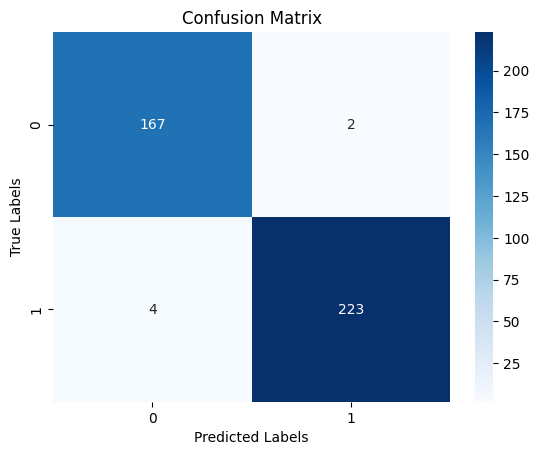

Gradient Boosting - Accuracy: 0.98
Gradient Boosting - Precision: 0.99
Gradient Boosting - Recall: 0.98


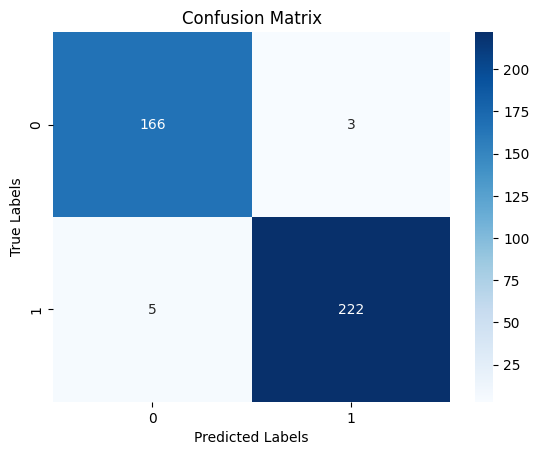

Support Vector Machine - Accuracy: 0.98
Support Vector Machine - Precision: 0.97
Support Vector Machine - Recall: 0.99


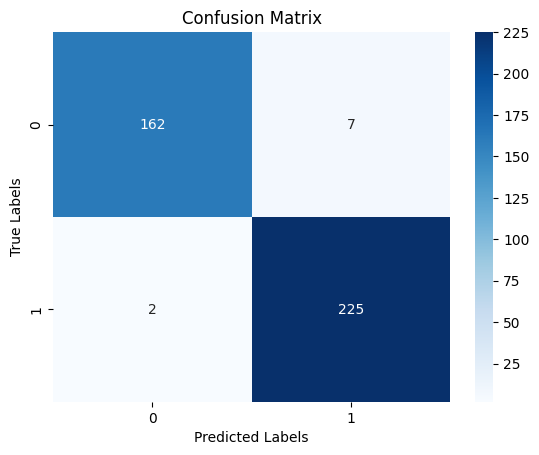

XGBoost - Accuracy: 0.99
XGBoost - Precision: 1.00
XGBoost - Recall: 0.98


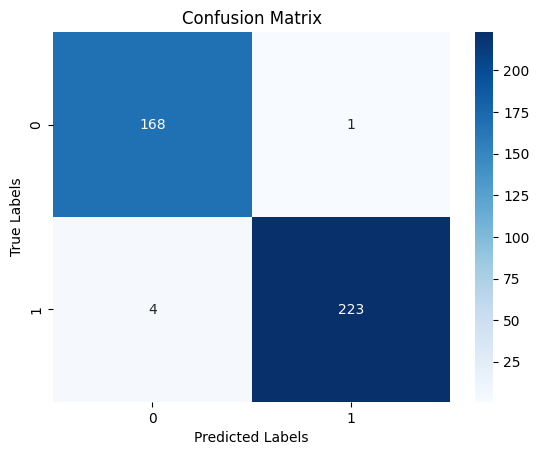

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

#define x and y
X2 = df2[['50_MA', '200_MA']]
y2 = df2['Signal']

# split data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=101)

# Create a dictionary of classifiers
classifiers = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier()
}

# create loop through each classifier and evaluate the classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    #accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{clf_name} - Accuracy: {accuracy:.2f}')

    #precision and recall scores
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f'{clf_name} - Precision: {precision:.2f}')
    print(f'{clf_name} - Recall: {recall:.2f}')

    # print the confusion matrix
    cmatrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()
